## Lab 3: Multiple regression

#### PS 1

In this lab you will build a linear model that takes into account both the advertising and the airplay, to predict album sales. 
First we need to fit a model using a bunch of known values of sales, advertising and airplay and then we need to derive the values of b0, b1 and b2 (the intercept and the slopes).
We then need to know the budget spent on advertising for the album of interest, and how many times it was played on the radio. 
If we have these five values (b0, b1, b2, advertising and airplay for the album) we can emit a prediction regarding how much the album will sell.


In [3]:
sales <- read.delim("path/sales.dat")
print(sales)

     adverts     sales  airplay attract
1     10.256       330       43      10
2    985.685       120       28       7
3   1445.563       360       35       7
4   1188.193       270       33       7
5    574.513       220       44       5
6    568.954       170       19       5
7    471.814        70       20       1
8    537.352       210       22       9
9    500.000       200       NA      NA
10   514.068       200       21       7
11   174.093       300       40       7
12  1720.806       290       32       7
13   611.479        70       20       2
14   251.192       150       24       8
15    97.972       190       38       6
16   406.814       240       24       7
17   265.398       100       25       5
18  1323.287       250       35       5
19   950.982       240 99999999       4
20   196.650       210       36       8
21  1326.598       280       27       8
22  1380.689       230       33       8
23   792.345       210       33       7
24   957.167       230       28       6


Examine your data. Are there data points that requires special attention? 
How can you find out?

The function summary() is a good starting point. 

In [5]:
summary(sales)

    adverts            sales              airplay            attract      
 Min.   :   9.104   Length:203         Min.   :       0   Min.   : 1.000  
 1st Qu.: 216.994   Class :character   1st Qu.:      20   1st Qu.: 6.000  
 Median : 526.480   Mode  :character   Median :      28   Median : 7.000  
 Mean   : 614.022                      Mean   :  495077   Mean   : 6.757  
 3rd Qu.: 911.600                      3rd Qu.:      36   3rd Qu.: 8.000  
 Max.   :2271.860                      Max.   :99999999   Max.   :10.000  
                                       NA's   :1          NA's   :1       

The output highlights that sales is a factor (it should be an integer, it’s the number of albums sold), and that the airplay and attract columns contain NA values.
Also, the maximum values of airplay looks suspiciously large (it’s unlikely that any song has been played on the radio 99 million times in a week, even if it may feel like it for some pop hits).


Check if your data frame contains NA values. 

To find which rows contain NA values you can use the command:

In [8]:
which(is.na(sales$airplay))

[1] 9

In [9]:
which(is.na(sales$attract))

[1] 9

To remove a row by index:

In [10]:
sales <- sales[-9, ]

To find and remove all rows containing NA values (all in one go):

In [11]:
sales <- sales[complete.cases(sales), ]
print(sales)

     adverts     sales  airplay attract
1     10.256       330       43      10
2    985.685       120       28       7
3   1445.563       360       35       7
4   1188.193       270       33       7
5    574.513       220       44       5
6    568.954       170       19       5
7    471.814        70       20       1
8    537.352       210       22       9
10   514.068       200       21       7
11   174.093       300       40       7
12  1720.806       290       32       7
13   611.479        70       20       2
14   251.192       150       24       8
15    97.972       190       38       6
16   406.814       240       24       7
17   265.398       100       25       5
18  1323.287       250       35       5
19   950.982       240 99999999       4
20   196.650       210       36       8
21  1326.598       280       27       8
22  1380.689       230       33       8
23   792.345       210       33       7
24   957.167       230       28       6
25  1789.659       320       30       9


Check the type of each column:

In [12]:
sapply(sales, class)

adverts       sales     airplay     attract 
  "numeric" "character"   "integer"   "integer"

Now, correct the data and make sure the column type is now appropriate for the analysis.
First converte the column to character, then again to numeric (forcing a column into another data type is called coercion):

In [13]:
converted_sales_column <- as.numeric(as.character(sales$sales))

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"


Then find the NA values indices:

In [14]:
which(is.na(converted_sales_column))

[1] 28

Or, in one long command:

In [16]:
which(is.na(as.numeric(as.character(sales$sales))))

Warning message in which(is.na(as.numeric(as.character(sales$sales)))):
"NAs introduced by coercion"


[1] 28

Or you can 
	- Coerce the column from factor to integer (not numeric, as there cannot be decimal places in the number of albums sold, in this example you cannot sell a third of an album)
	- Correct the now missing (NA) cell value in row 28
	- Put the column back into the data frame

In [18]:
corrected_sales <- as.integer(as.character(sales$sales))
corrected_sales
corrected_sales[28] <- 249
sales$sales <- corrected_sales
print(sales)

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"


[1] 330 120 360 270 220 170  70 210 200 300 290  70 150 190 240 100 250 240
 [19] 210 280 230 210 230 320 210 230 250  NA  60 330 150 150 180  80 180 130
 [37] 320 280 200 130 190 150 230 310 340 240 180 220  40 190 290 340 250 190
 [55] 120 230 190 210 170 310  90 140 300 340 170 100 200  80 100  70  50 240
 [73] 160 290 140 210 300 230 280 160 200 110 110  70 100 190  70 360 360 300
 [91] 120 150 220 280 300 140 290 180 140 210 250 250 120 290  60 140 290 160
[109] 100 160 150 140 230 230  30  80 190  90 120 150 230 150 210 180 140 360
[127]  10 240 270 290 220 230 220 240 260 170 130 270 140  60 210 210 240 210
[145] 200 140  90 120 100 360 180 150 110  90 160 230  40  60 230 230 120 150
[163] 120  60 280 120 230 230  40 140 360 210 260 250 200 150 250 100 260 210
[181] 290 220  70 110 250 320 300 180 180 200 320 140 100 120 230 150 250 190
[199] 240 250 230 110

     adverts sales  airplay attract
1     10.256   330       43      10
2    985.685   120       28       7
3   1445.563   360       35       7
4   1188.193   270       33       7
5    574.513   220       44       5
6    568.954   170       19       5
7    471.814    70       20       1
8    537.352   210       22       9
10   514.068   200       21       7
11   174.093   300       40       7
12  1720.806   290       32       7
13   611.479    70       20       2
14   251.192   150       24       8
15    97.972   190       38       6
16   406.814   240       24       7
17   265.398   100       25       5
18  1323.287   250       35       5
19   950.982   240 99999999       4
20   196.650   210       36       8
21  1326.598   280       27       8
22  1380.689   230       33       8
23   792.345   210       33       7
24   957.167   230       28       6
25  1789.659   320       30       9
26   656.137   210       34       7
27   613.697   230       49       7
28   313.362   250       40 

Now the data is technically correct, let’s make the data consistent, that is, including only data points meaningful for that domain.  

Remove the rows containing dramatic outliers.

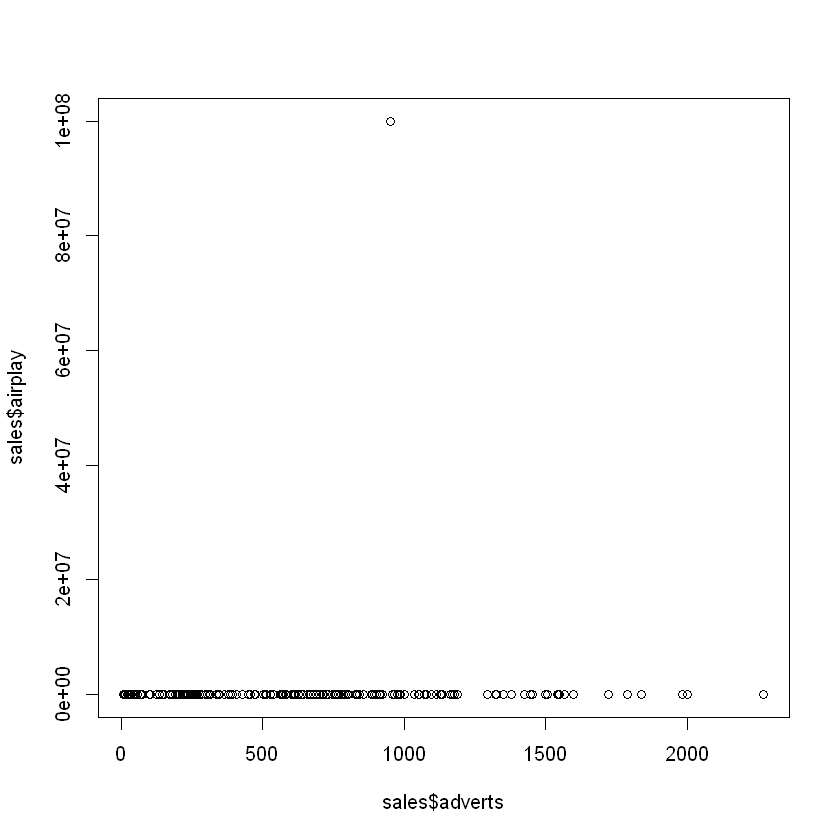

In [19]:
plot(sales$adverts, sales$airplay)

You can find the data point by selecting any row with high airplay:

In [20]:
which(sales$airplay > 50)

[1]  18  44  74 101 107 121 126 166 185

In [21]:
which(sales$airplay > 100)

[1] 18

Remove row 18:

In [22]:
sales <- sales[-18, ]

We had 203 records (data frame rows) initially, now we have 201 left:


In [23]:
length(sales$airplay)

[1] 201

Let's have a look at the plots

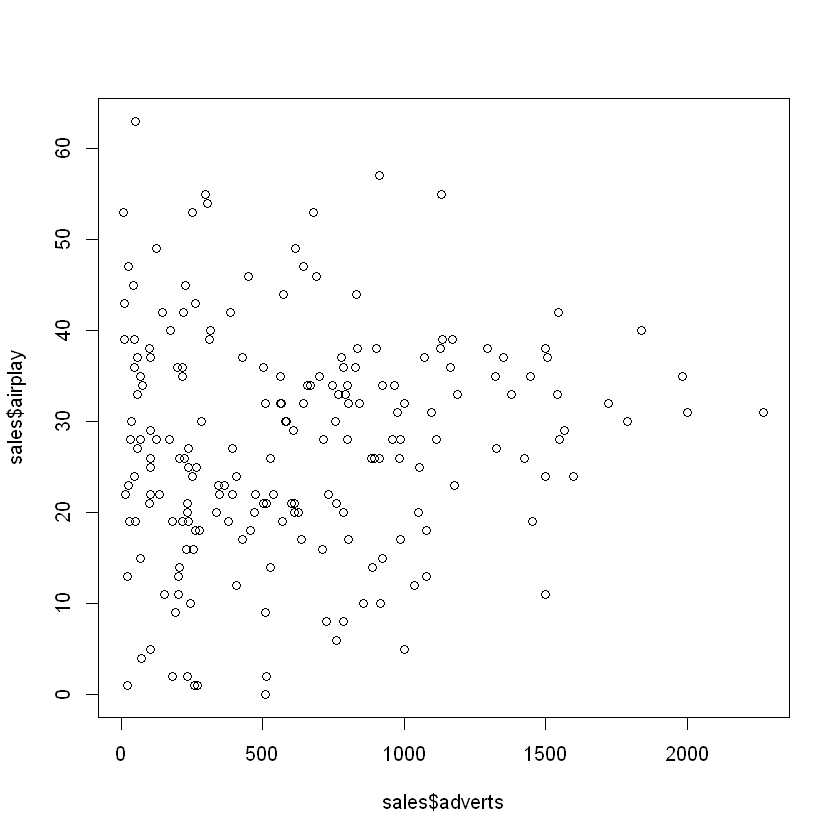

In [24]:
plot(sales$adverts, sales$airplay)

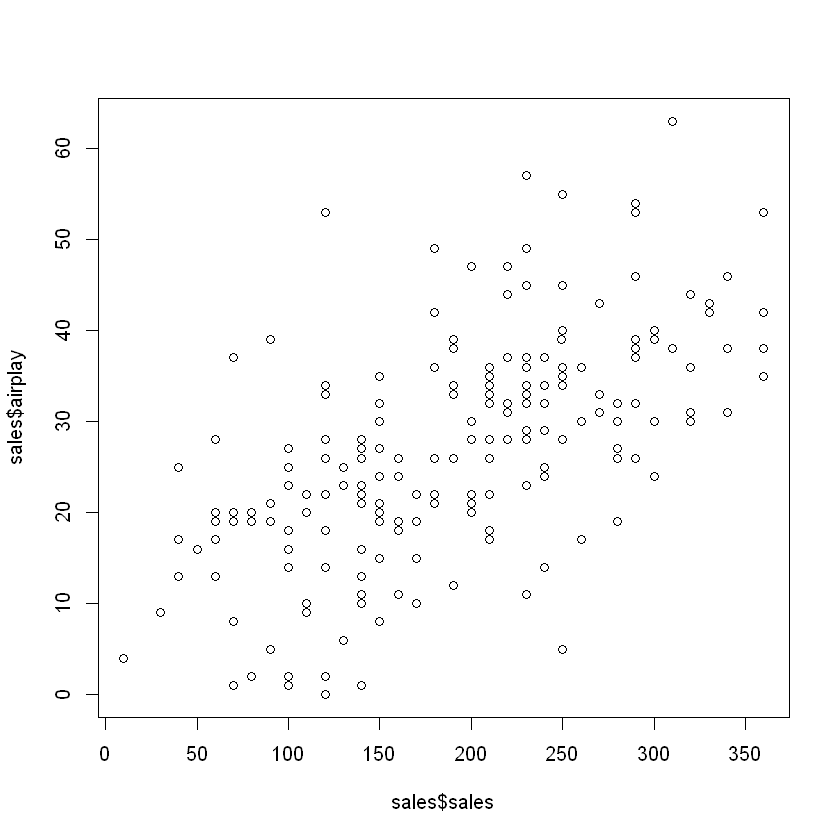

In [25]:
plot(sales$sales, sales$airplay)

Generate in R a multiple linear model to predict sales from airplay and adverts.

In [27]:
sales_model <- lm(sales ~ adverts + airplay, data = sales)
summary(sales)

    adverts             sales          airplay         attract      
 Min.   :   9.104   Min.   : 10.0   Min.   : 0.00   Min.   : 1.000  
 1st Qu.: 215.994   1st Qu.:140.0   1st Qu.:20.00   1st Qu.: 6.000  
 Median : 526.480   Median :200.0   Median :28.00   Median : 7.000  
 Mean   : 612.913   Mean   :193.5   Mean   :27.56   Mean   : 6.771  
 3rd Qu.: 910.851   3rd Qu.:250.0   3rd Qu.:36.00   3rd Qu.: 8.000  
 Max.   :2271.860   Max.   :360.0   Max.   :63.00   Max.   :10.000  

Generate a model with only one predictor, advertisement:



In [28]:
sales_model_1var <- lm(sales ~ adverts, data = sales)

Now update the model to keep the same output and predictors as the input model (this is what the .~. symbols mean, it is not a frowning emoticon) and add the “airplay” and “attract” data:



In [29]:
sales_model_3var <- update(object = sales_model_1var, .~. + airplay + attract)

Now compare the two models, the 1var model contains only adverts:

In [30]:
summary(sales_model_1var)


Call:
lm(formula = sales ~ adverts, data = sales)

Residuals:
     Min       1Q   Median       3Q      Max 
-153.428  -43.864   -0.628   37.063  211.191 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.349e+02  7.526e+00  17.924   <2e-16 ***
adverts     9.558e-02  9.639e-03   9.917   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 66.1 on 199 degrees of freedom
Multiple R-squared:  0.3307,	Adjusted R-squared:  0.3274 
F-statistic: 98.34 on 1 and 199 DF,  p-value: < 2.2e-16


While the 3var model contains also airplay and attractiveness:

In [31]:
summary(sales_model_3var)


Call:
lm(formula = sales ~ adverts + airplay + attract, data = sales)

Residuals:
     Min       1Q   Median       3Q      Max 
-122.125  -28.324   -0.207   29.243  143.551 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -26.719337  17.337079  -1.541    0.125    
adverts       0.084587   0.006909  12.243  < 2e-16 ***
airplay       3.383720   0.276904  12.220  < 2e-16 ***
attract      11.092158   2.436088   4.553 9.24e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 47.05 on 197 degrees of freedom
Multiple R-squared:  0.6642,	Adjusted R-squared:  0.6591 
F-statistic: 129.9 on 3 and 197 DF,  p-value: < 2.2e-16


The adverts-only model accounts for about 32.7% of the variation. The three-predictors model accounts for 65.9% of the variation.
Comparing the R squared to the adjusted R squared can give us an idea of how a model generalises. Ideally, we want the R squared and adjusted R squared values to be close. This means that te amount of variation accounted for does not shrink too much when we move from a model derived from a sample (R squared) to a model derived – ideally – from the population (adjusted R squared).
Luckily, the variance accounted for does not shrink too much for any of the models (from 33.1% to 32.7% and from 66.4% to 65.9%).



Adapted from:

Discovering statistics using R. Authors: A. Field, J. Miles, Z. Field. Publisher: Sage, 2012 (chapter 7 – Multiple regression, p 261-311)

Research methods and statistics 2, Tom Booths and Alex Doumas 2018.